In [1]:
import pandas as pd   
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

4.	Using the pandas `read_csv()` method, read the GDP dataset into your notebook as a DataFrame called `gdp_df`. Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.

In [2]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv')

5. How many rows and columns are in `gdp_df`? What are the data types of each column?

In [3]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7176 entries, 0 to 7175
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  7176 non-null   object 
 1   Year             7176 non-null   int64  
 2   Value            7176 non-null   float64
 3   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 224.4+ KB


6. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [4]:
gdp_df = gdp_df.drop('Value Footnotes', axis=1)

In [5]:
gdp_df = gdp_df.rename(columns={'Country or Area':'Country','Value':'GDP_Per_Capita'})

In [6]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7176 entries, 0 to 7175
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         7176 non-null   object 
 1   Year            7176 non-null   int64  
 2   GDP_Per_Capita  7176 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 168.3+ KB


7. How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice? 

In [7]:
years=gdp_df['Country'].value_counts(sort=True, ascending=True)
less_than_31=years.reset_index() 
less_than_31.columns = ['Country', 'number_of_years']
less_than_31=less_than_31[less_than_31['number_of_years']<31]
print(less_than_31)

                      Country  number_of_years
0                     Somalia                8
1                    Djibouti                8
2    Turks and Caicos Islands               10
3   Sint Maarten (Dutch part)               10
4                      Kosovo               13
5              Cayman Islands               15
6                       Nauru               17
7                 Afghanistan               19
8     SÃ£o TomÃ© and Principe               20
9                 Timor-Leste               21
10                   CuraÃ§ao               21
11                    Liberia               21
12                      Qatar               21
13                      Palau               21
14         Other small states               21
15                      Libya               22
16                 Montenegro               24
17                 San Marino               24
18               Small states               24
19                     Canada               24
20           

8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

In [8]:
graph_gdp = gdp_df[(gdp_df['Year']==2020) & (gdp_df['GDP_Per_Capita'])]

c:\Users\12564\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GDP_Per_Capita'>

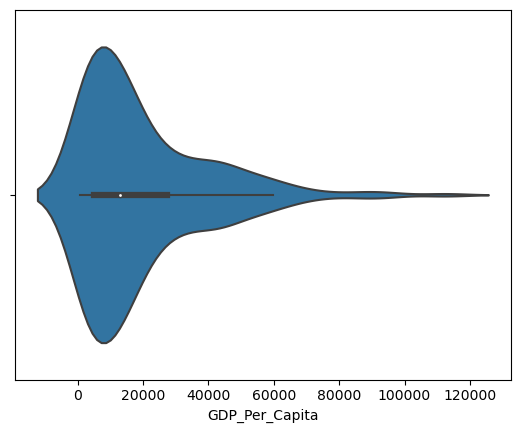

In [9]:
sns.violinplot(graph_gdp['GDP_Per_Capita'])

<AxesSubplot:xlabel='GDP_Per_Capita', ylabel='Density'>

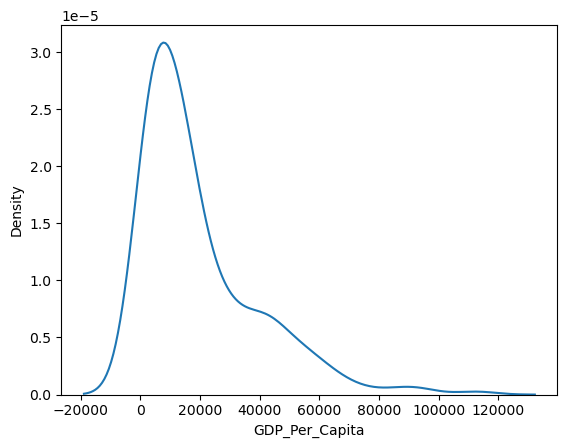

In [10]:
sns.kdeplot(graph_gdp['GDP_Per_Capita'])

c:\Users\12564\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GDP_Per_Capita'>

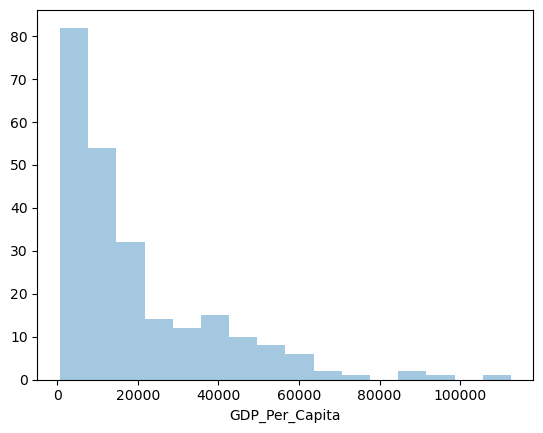

In [11]:
sns.distplot(a=graph_gdp['GDP_Per_Capita'],hist=True,kde=False,rug=False)

c:\Users\12564\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GDP_Per_Capita'>

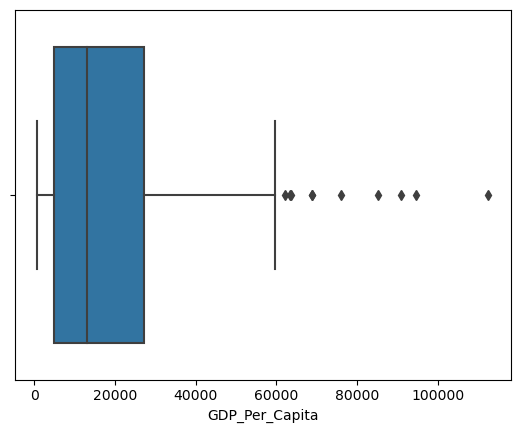

In [12]:
sns.boxplot(graph_gdp['GDP_Per_Capita'])

9. What was the median GDP per capita value in 2020?

In [13]:
gdp2020= gdp_df[(gdp_df['Year']==2020)]
gdp2020['GDP_Per_Capita'].median()

12908.9374056206

10. For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:
	* A boxplot
	* A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
	* A scatterplot
	* A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)  
Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.

<AxesSubplot:xlabel='Year', ylabel='GDP_Per_Capita'>

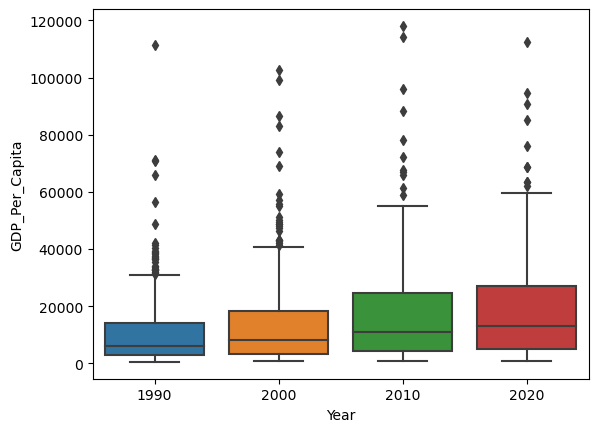

In [14]:
gdp_decades = gdp_df[gdp_df['Year'].isin([1990,2000,2010,2020])]
sns.boxplot(x=gdp_decades['Year'],y=gdp_decades['GDP_Per_Capita'])

<AxesSubplot:xlabel='Year', ylabel='GDP_Per_Capita'>

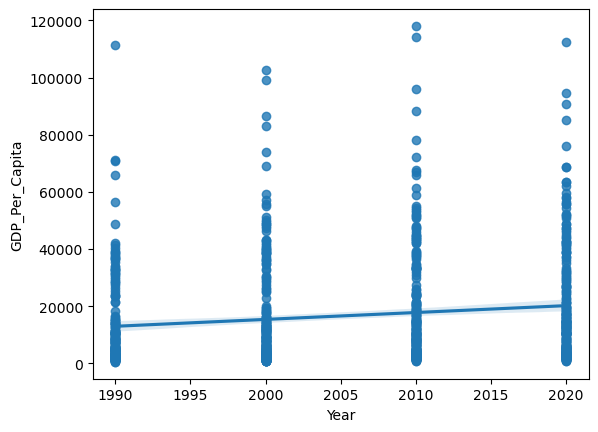

In [15]:
sns.regplot(x=gdp_decades['Year'], y=gdp_decades['GDP_Per_Capita'])

<BarContainer object of 918 artists>

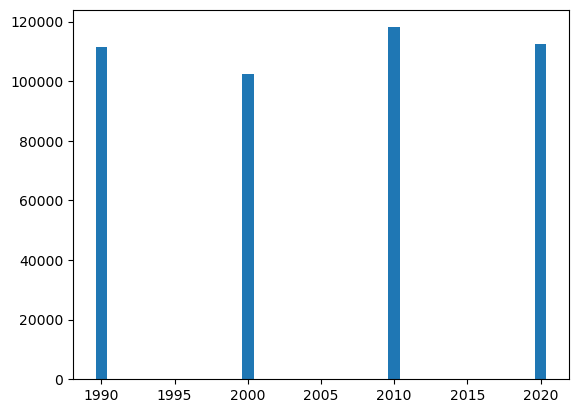

In [16]:
plt.bar(gdp_decades['Year'],gdp_decades['GDP_Per_Capita'])

11. Which country was the first to have a GDP per capita greater than $100,000?

In [17]:
gdp_filtered = gdp_df[gdp_df['GDP_Per_Capita'] >= 100000]
gdp_grouped = gdp_filtered.groupby('Country').agg({'Year': 'min', 'GDP_Per_Capita': 'first'}) 
gdp_grouped = gdp_grouped.reset_index() 
gdp_grouped.columns = ['Country', 'Year', 'GDP_Per_Capita'] 
print(gdp_grouped)

                Country  Year  GDP_Per_Capita
0            Luxembourg  2001   112557.309472
1      Macao SAR, China  2010   127272.548511
2  United Arab Emirates  1990   102494.714624


12. Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

Country
Luxembourg    112557.309472
Name: GDP_Per_Capita, dtype: float64


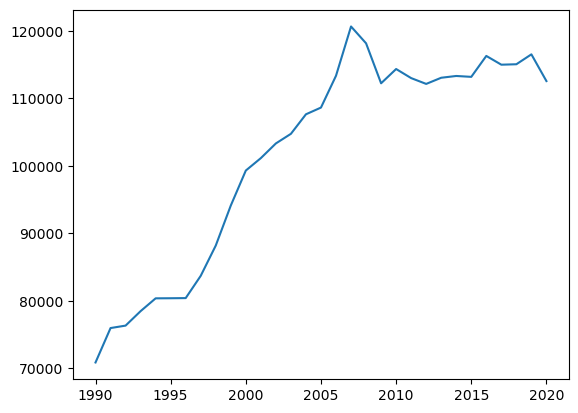

In [18]:
gdp2020=gdp_df[gdp_df['Year']==2020]
max20gdp=gdp2020.groupby('Country')['GDP_Per_Capita'].max().sort_values(ascending=False)
print(max20gdp.head(1))
luxgdp=gdp_df[gdp_df['Country']=='Luxembourg']
plt.plot(luxgdp['Year'],luxgdp['GDP_Per_Capita'])

13. Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset. **Bonus question:** Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?

Country
Burundi    731.064074
Name: GDP_Per_Capita, dtype: float64


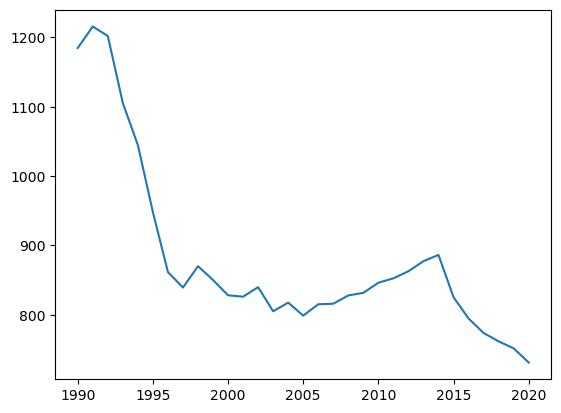

In [19]:
min20gdp=gdp2020.groupby('Country')['GDP_Per_Capita'].min().sort_values(ascending=True)
print(min20gdp.head(1))
bur_gdp=gdp_df[gdp_df['Country']=='Burundi']
plt.plot(bur_gdp['Year'],bur_gdp['GDP_Per_Capita'])

In [20]:
gdp_df[gdp_df['Year']==1990]['GDP_Per_Capita'].mean()

12465.941627925595

In [21]:
gdp_df[gdp_df['Year']==2020]['GDP_Per_Capita'].mean()

19496.88171245749

In [22]:
jgp= gdp_df[gdp_df['Year'].isin([1990,2020])]
print(jgp)

                          Country  Year  GDP_Per_Capita
0                     Afghanistan  2020     1970.560169
19    Africa Eastern and Southern  2020     3491.978104
49    Africa Eastern and Southern  1990     3083.976800
50     Africa Western and Central  2020     4021.293919
80     Africa Western and Central  1990     2810.341129
...                           ...   ...             ...
7113                        World  1990     9704.621768
7114                       Zambia  2020     3277.816510
7144                       Zambia  1990     2190.181724
7145                     Zimbabwe  2020     2134.555461
7175                     Zimbabwe  1990     2652.129209

[446 rows x 3 columns]


14. Read in the internet use dataset into a DataFrame named `internet_df`. You will likely get errors when doing this. Check the arguments for the read_csv function to find ones that can help correct the errors (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) Once you are able to read it in, take per a look at the top and bottom few rows to make sure that it has been read in correctly. Also, check the datatypes of the columns.

In [23]:
internet_df = pd.read_csv('../data/internet_use.csv',nrows=4495)
print(internet_df.head())
internet_df.info()

  Country or Area  Year     Value  Value Footnotes
0     Afghanistan  2014  6.390000              NaN
1     Afghanistan  2013  5.900000              NaN
2     Afghanistan  2012  5.454545              NaN
3     Afghanistan  2011  5.000000              NaN
4     Afghanistan  2010  4.000000              NaN
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4495 entries, 0 to 4494
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  4495 non-null   object 
 1   Year             4495 non-null   int64  
 2   Value            4495 non-null   float64
 3   Value Footnotes  948 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 140.6+ KB


15. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'

In [24]:
internet_df = internet_df.drop('Value Footnotes', axis=1)
internet_df = internet_df.rename(columns={'Country or Area':'Country','Value':'Internet_Users_Pct'})
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4495 entries, 0 to 4494
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             4495 non-null   object 
 1   Year                4495 non-null   int64  
 2   Internet_Users_Pct  4495 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 105.5+ KB


16. Look at the number of observations in this dataset per year. What do you notice?

In [25]:
obser_int=internet_df['Year'].value_counts()
print(obser_int)

1990    210
2011    207
2007    206
2008    204
2012    203
2010    203
2009    203
2014    202
2013    202
2002    202
2005    201
2001    201
2006    200
2000    199
2004    199
1999    198
2003    196
1998    190
1997    184
1996    175
1995    138
1994     91
1993     65
1992     50
1991     39
1989      8
1980      7
1965      7
1970      7
1975      7
1976      7
1977      7
1978      7
1979      7
1982      7
1981      7
1983      7
1984      7
1985      7
1986      7
1987      7
1988      7
1960      7
Name: Year, dtype: int64


17. What is the first year to have a non-zero internet users percentage value?

In [26]:
int_filtered = internet_df[internet_df['Internet_Users_Pct'] > 0]
print(int_filtered.sort_values(by='Year', ascending=True).head(1))

     Country  Year  Internet_Users_Pct
2048   Italy  1990            0.017545


18. How does the distribution of internet users percent differ for 2000 and 2014?

In [27]:
users= internet_df[internet_df['Year'].isin([2000,2014])]
print(users)

          Country  Year  Internet_Users_Pct
0     Afghanistan  2014            6.390000
15        Albania  2014           60.100000
29        Albania  2000            0.114097
36        Algeria  2014           18.090000
50        Algeria  2000            0.491706
...           ...   ...                 ...
4445        Yemen  2000            0.082500
4451       Zambia  2014           17.340000
4465       Zambia  2000            0.191072
4473     Zimbabwe  2014           19.890000
4487     Zimbabwe  2000            0.401434

[401 rows x 3 columns]


19. For how many countries was the percentage of internet users below 5% in 2014?

In [28]:
less_than_5=internet_df[(internet_df['Internet_Users_Pct']<5) & (internet_df['Year']==2014)]
print(less_than_5.count())

Country               16
Year                  16
Internet_Users_Pct    16
dtype: int64


20. Merge the two DataFrames to one. Do this in a way that keeps **all rows** from each of the two DataFrames. Call the new DataFrame `gdp_and_internet_use`. Look at the first and last few rows to confirm that it merged correctly.

In [29]:
gdp_and_internet_use = pd.merge(gdp_df, internet_df, on = ['Country','Year'])

21. Find the three countries with the highest internet users percentage in 2014. Use a seaborn FacetGrid (https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) to compare how the GDP per capita has changed over time for these three countries. What do you notice?

In [30]:
max_2014 = gdp_and_internet_use[(gdp_and_internet_use['Year']==2014)].sort_values('Internet_Users_Pct', ascending=False).head(3)
max_2014_count = max_2014['Country']
top_3_int_users = gdp_and_internet_use[gdp_and_internet_use['Country'].isin(max_2014_count)]

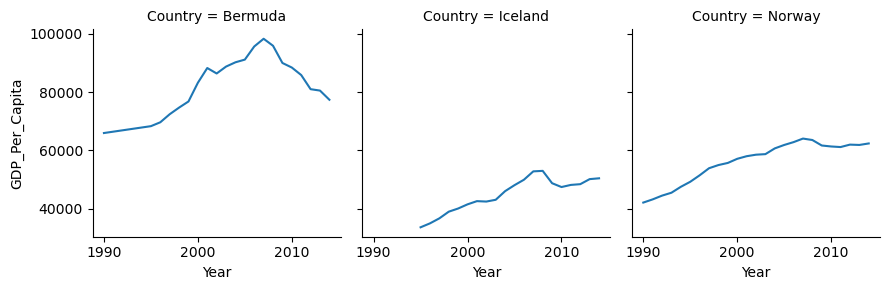

In [31]:
g = sns.FacetGrid(top_3_int_users, col= 'Country')
g.map(sns.lineplot, 'Year', 'GDP_Per_Capita')

22. Subset `gdp_and_internet_use` to just the year 2014. Save this as a new dataframe named `gdp_and_internet_use_2014`.

In [32]:
gdp_and_internet_use_2014 = gdp_and_internet_use[gdp_and_internet_use['Year']==2014]

23. Create a plot which compares Internet Users Percentage and GDP per Capita for the year 2014. What do you notice from this plot? If you see any unusual points, investigate them.

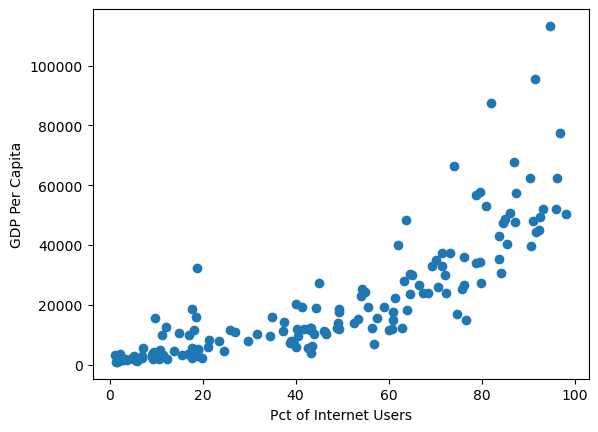

In [33]:
plt.scatter(gdp_and_internet_use_2014['Internet_Users_Pct'],gdp_and_internet_use_2014['GDP_Per_Capita'])
plt.xlabel('Pct of Internet Users')
plt.ylabel('GDP Per Capita')
plt.show()

24. **Stretch Question:** Use the `qcut` function from pandas (https://pandas.pydata.org/docs/reference/api/pandas.qcut.html) to divide countries in `gdp_per_capita_2014` into three groups based on their GDP per capita values. Label these groups as "Low", "Medium", and "High". Put these labels in a new column, named "GDP_group".


In [34]:
gdp_and_internet_use_2014['GDP_group'] = pd.qcut(gdp_and_internet_use_2014['GDP_Per_Capita'], q=3, labels=['Low','Medium','High'])
print(gdp_and_internet_use_2014)

                  Country  Year  GDP_Per_Capita  Internet_Users_Pct GDP_group
0             Afghanistan  2014     2102.384604                6.39       Low
13                Albania  2014    11586.833878               60.10    Medium
34                Algeria  2014    11512.690472               18.09    Medium
56                 Angola  2014     8240.347981               21.26    Medium
76    Antigua and Barbuda  2014    18104.683788               64.00    Medium
...                   ...   ...             ...                 ...       ...
3308              Uruguay  2014    22419.043746               61.46    Medium
3330           Uzbekistan  2014     6075.192224               43.55       Low
3351              Vanuatu  2014     2984.243485               18.80       Low
3371               Zambia  2014     3450.037600               17.34       Low
3393             Zimbabwe  2014     2357.651166               19.89       Low

[163 rows x 5 columns]


C:\Users\12564\AppData\Local\Temp\ipykernel_20992\3005276836.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_and_internet_use_2014['GDP_group'] = pd.qcut(gdp_and_internet_use_2014['GDP_Per_Capita'], q=3, labels=['Low','Medium','High'])


25. **Stretch Question:** How does the median internet users percentage compare for the three gdp groups?

In [38]:
f = gdp_and_internet_use_2014.groupby('GDP_group')['Internet_Users_Pct'].median()
pd.merge(gdp_and_internet_use_2014, f, on='GDP_group')

,Country,Year,GDP_Per_Capita,Internet_Users_Pct_x,GDP_group,Internet_Users_Pct_y
0,Afghanistan,2014,2102.384604,6.39,Low,10.7
1,Bangladesh,2014,4157.919304,9.60,Low,10.7
2,Belize,2014,7239.278269,38.70,Low,10.7
3,Benin,2014,2975.854782,5.30,Low,10.7
4,Burkina Faso,2014,1907.949213,9.40,Low,10.7
...,...,...,...,...,...,...
158,Switzerland,2014,67682.686175,87.00,High,79.7
159,Trinidad and Tobago,2014,29864.026457,65.10,High,79.7
160,United Arab Emirates,2014,62452.184508,90.40,High,79.7
161,United Kingdom,2014,44239.151060,91.61,High,79.7
